In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# DATA CLEANING

In [3]:
img =cv2.imread('C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/lionel_messi/8e28dca199d2c529e710f2fc7550fc85.jpg')
img

array([[[229, 221, 221],
        [229, 221, 221],
        [229, 221, 221],
        ...,
        [225, 218, 215],
        [225, 218, 215],
        [225, 218, 215]],

       [[229, 221, 221],
        [229, 221, 221],
        [229, 221, 221],
        ...,
        [225, 218, 215],
        [225, 218, 215],
        [225, 218, 215]],

       [[229, 221, 221],
        [229, 221, 221],
        [229, 221, 221],
        ...,
        [225, 218, 215],
        [225, 218, 215],
        [225, 218, 215]],

       ...,

       [[213, 192, 194],
        [216, 195, 197],
        [216, 198, 199],
        ...,
        [196, 175, 178],
        [198, 177, 180],
        [200, 179, 182]],

       [[212, 191, 193],
        [215, 194, 196],
        [216, 198, 199],
        ...,
        [197, 176, 179],
        [200, 179, 182],
        [202, 181, 184]],

       [[207, 186, 188],
        [211, 190, 192],
        [213, 195, 196],
        ...,
        [195, 174, 177],
        [197, 176, 179],
        [198, 177, 180]]

In [4]:
img.shape

(612, 408, 3)

(-0.5, 407.5, 611.5, -0.5)

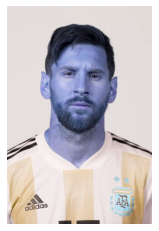

In [5]:
plt.imshow(img)
plt.axis('off')

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [7]:
gray


array([[222, 222, 222, ..., 218, 218, 218],
       [222, 222, 222, ..., 218, 218, 218],
       [222, 222, 222, ..., 218, 218, 218],
       ...,
       [195, 198, 200, ..., 178, 180, 182],
       [194, 197, 200, ..., 179, 182, 184],
       [189, 193, 197, ..., 177, 179, 180]], dtype=uint8)

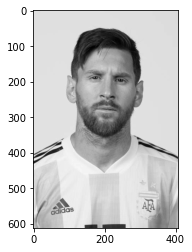

In [8]:
plt.imshow(gray,cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier('C:/Users/Dell/Desktop/MACHINE LEARNIG/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Dell/Desktop/MACHINE LEARNIG/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[103, 108, 211, 211]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(103, 108, 211, 211)

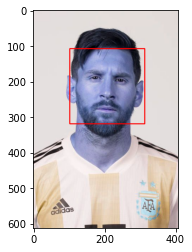

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

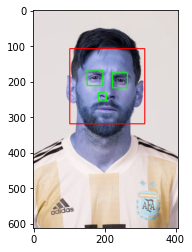

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

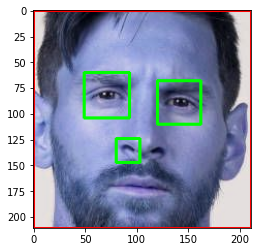

In [18]:
plt.imshow(roi_color, cmap='gray')

In [22]:
cropped_img = np.array(roi_color)
cropped_img.shape

(211, 211, 3)

In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

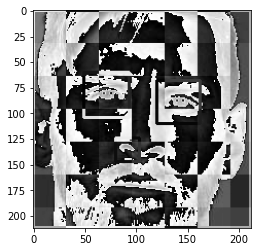

In [24]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

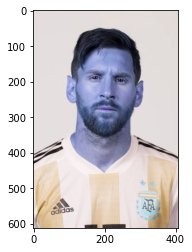

In [26]:
original_image = cv2.imread('C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/lionel_messi/8e28dca199d2c529e710f2fc7550fc85.jpg')
plt.imshow(original_image)

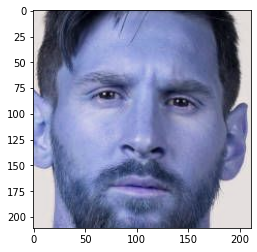

In [27]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/lionel_messi/8e28dca199d2c529e710f2fc7550fc85.jpg')
plt.imshow(cropped_image)

#Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [47]:
path_to_data = "C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/"
path_to_cr_data = "C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/cropped/"


In [48]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [49]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [50]:
img_dirs

['C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/.svn',
 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/cropped',
 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/lionel_messi',
 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/maria_sharapova',
 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/roger_federer',
 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/serena_williams',
 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/virat_kohli']

In [60]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

PermissionError: [WinError 5] Access is denied: 'C:/Users/Dell/Desktop/MACHINE LEARNIG/DATA/cropped/.svn\\pristine\\05\\056d7c3f11c19add0ef995a00e9f72947f23aba8.svn-base'

In [52]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [53]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{}

In [54]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{}

In [55]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [56]:
X[0]

IndexError: list index out of range

In [57]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(0, 4096)

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators['svm'].score(X_test,y_test)

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')